In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("../../")

In [3]:
from torchganime.data.video import SceneDataset
from pytorchvideo.transforms import Permute, Normalize
from torchvision import transforms

In [4]:
vd = SceneDataset(
    ["../../data/snk/raw_videos/", "../../data/kny/raw_videos/"], 
    transform=transforms.Compose([
        Permute((3, 0, 1, 2)), 
        # Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
        ]
        ),
    recursive=True, 
    show_progress=True,
    min_max_len=(15, 25),
    detector="content", 
    threshold=15, 
    min_scene_len=15, 
    )

2022-12-28 10:46:19.398 | INFO     | torchganime.data.video:_get_video_paths:356 - Finding video files inside ../../data/snk/raw_videos/ ...
2022-12-28 10:46:28.815 | INFO     | torchganime.data.video:_get_video_paths:356 - Finding video files inside ../../data/kny/raw_videos/ ...
2022-12-28 10:46:34.374 | INFO     | torchganime.data.video:_get_video_paths:364 - Found 129 videos
2022-12-28 10:46:34.376 | INFO     | torchganime.data.video:detect_scenes:240 - Detecting scenes in /TorchGANime/data/kny/raw_videos/01.mkv...
Detected: 567 | Progress: 100%|█████████▉| 34045/34047 [00:24<00:00, 1386.28frames/s]
2022-12-28 10:46:59.043 | INFO     | torchganime.data.video:detect_scenes:240 - Detecting scenes in /TorchGANime/data/kny/raw_videos/02.mkv...
Detected: 239 | Progress:  35%|███▍      | 11853/34049 [00:08<00:15, 1458.65frames/s]

torch.Size([3, 966, 6802])


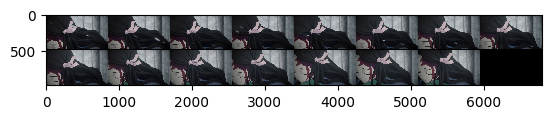

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision.utils as vutils

def show(img):
   npimg = img.numpy()
   plt.imshow(np.transpose(npimg, (1,2,0)), interpolation='nearest')

video = vd[10]
video = video.permute(1, 0, 2,3)
grid = vutils.make_grid(video)
print(grid.shape)
show(grid)